In [1]:
# binning data 
# we have 100 values and need to find quickly 
# where they fall within an array of bins 
import numpy as np 
rng = np.random.default_rng(seed = 1701)

In [3]:
x = rng.normal(size=100)
x 

array([ 0.82092772, -1.15517027, -0.97122683, -0.17132741, -0.81601727,
        0.30868046,  0.65027227,  1.99948343, -0.54281894, -0.54011181,
       -0.96727256,  2.46932209,  0.53446783, -0.94172735,  0.19635787,
       -0.28790612,  1.83545534, -2.86714255, -0.38426121,  1.51783286,
        0.58773544,  1.68491423,  0.1117977 ,  1.74346136,  2.57854436,
        1.62611734, -0.23100508, -0.37392389,  0.2955216 , -0.285729  ,
        0.60083079, -2.012344  , -0.98260905,  0.25913521,  0.23989729,
       -0.51177971, -0.15886684, -0.09464162,  0.57566875, -0.26319484,
        1.39451378, -0.08624404, -2.02750209, -0.76558753,  0.04948999,
        0.95866903, -0.43409852, -0.22062555, -0.35983424, -0.91564192,
       -0.03635412, -0.87350513, -0.02706269,  0.19121406, -0.88878911,
        0.29404227, -1.5669326 , -0.85128698, -0.79576316,  1.58456721,
       -1.7507953 ,  0.86982133,  1.21317601,  0.81136972,  1.63733809,
       -2.75419904, -0.70381415, -0.99684953,  2.16985967, -0.21

In [7]:
# compute a histogram by hand 
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

bins, counts 

(array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

In [8]:
# find the appropriate bin for each x 
i = np.searchsorted(bins, x)
i 

array([12,  8,  8, 10,  8, 11, 11, 14,  9,  9,  8, 15, 11,  8, 10,  9, 13,
        5,  9, 13, 11, 13, 10, 13, 15, 13, 10,  9, 11,  9, 11,  6,  8, 10,
       10,  9, 10, 10, 11,  9, 13, 10,  6,  9, 10, 12,  9, 10,  9,  8, 10,
        8, 10, 10,  8, 11,  7,  8,  8, 13,  7, 12, 12, 12, 13,  5,  9,  8,
       14, 10,  7,  6,  9,  6, 10, 10,  9, 11, 13, 11, 10,  9, 14, 10,  7,
        9,  9, 10, 11,  8, 12, 10,  7, 10, 10, 13,  9, 14, 13, 10])

In [10]:
# add 1 to each of these bins 
np.add.at(counts, i, 1)
counts

array([ 0.,  0.,  0.,  0.,  0.,  4.,  8., 10., 26., 36., 48., 22., 12.,
       22.,  8.,  4.,  0.,  0.,  0.,  0.])

In [ ]:
# the counts now reflect the number of points within each bin - in other words 
# a histogram

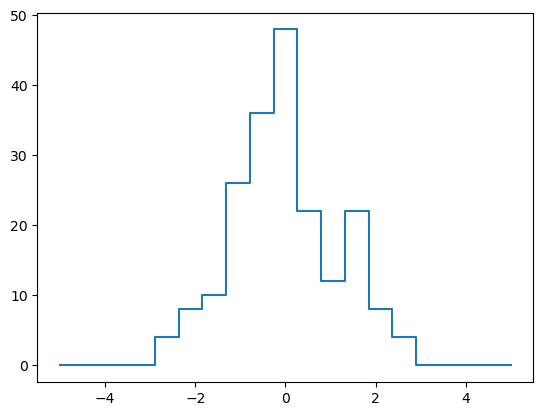

In [11]:
# plot the results 
from matplotlib import pyplot as plt

plt.plot(bins,counts,drawstyle="steps");

(array([ 0.,  0.,  0.,  0.,  2.,  4.,  5., 13., 18., 24., 11.,  6., 11.,
         4.,  2.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x7aeb3d530c50>])

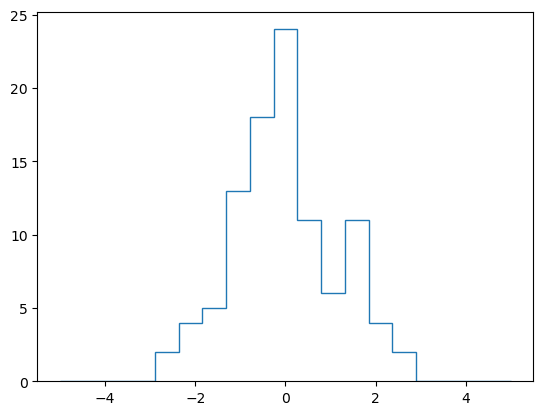

In [12]:
plt.hist(x, bins, histtype="step")  # no need to search "counts"

In [13]:
print(f"numpy histogram {len(x)} points:")
%timeit counts, edges = np.histogram(x,bins)

print(f"custom histogram {len(x)} points:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

numpy histogram 100 points:
71.6 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
custom histogram 100 points:
41.7 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
